# Vyhodnocení gama analýzy

Načteme knihovny, které se v analýze dat v Pythonu používají téměř vždy:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [4]:
import sys
sys.path.append(r"D:\thesis\model\python_lib")
%load_ext autoreload
%autoreload 2
import os

data_dir = r"."
os.environ["LGK_DATA_PREFIX"] = data_dir

In [5]:
import gamma
import dose
import data

Načteme data nasimulovaná Geantem:

In [9]:
mc = dose.get_dose("gel", "mc")[1:-1,1:-1,1:-1]     # Ignoruj body na kraji
mc2 = dose.zoom2_array(mc)                          # Interpoluj na dvojnásobné rozlišení

Podobným způsobem načteme data z Leksell GammaPlanu. Vybíráme si data z algoritmu **Convolution**.

Následně spočítáme matice s gama indexem.

In [18]:
gammas = {}
hf = h5py.File("data/gamma.h5")

for study in ["gel", "adenoma", "neuralgia"]:
    d = dose.get_dose(study, "convolution")
    d2 = dose.zoom2_array(d)
    dta = 2 / data.targets[study].grid 
    
    # Spočítej gama
    study_gamma = gamma.gamma_matrix(core(mc2, 40), core(d2, 40), dta=dta, dd=0.03)
    hf["convolution-%s" % study] = study_gamma
    gammas[study] = study_gamma
    
hf.flush()
hf.close()

In [ ]:
gammas["gel"].shape   # Jak vypadá matice

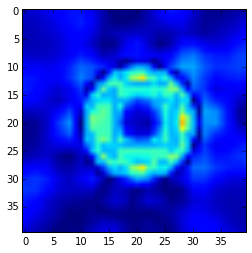

In [21]:
plt.imshow(gammas["gel"][:,:,20], vmin=0, vmax=1.7)